In [1]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import skimage.io
import time
import cv2
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris, make_classification
from mpl_toolkits.mplot3d import Axes3D

# Linear Algebra Exercise
## Vectors, Matrices, Transformations. Applications of Linear Algebra

### Problem 1. Basis Vectors in 2D Coordinate Space
We know that for an n-dimensional vector space, we need **exactly n** vectors to form a basis. Let's visualize that.

The function you wrote last time for visualizing complex numbers can be extended to visualize any set of vectors. If you haven't already written that, have a look at [this StackOverflow post](https://stackoverflow.com/questions/12265234/how-to-plot-2d-math-vectors-with-matplotlib). You need to use the `quiver()` function. Pay attention to its parameters so you use it correctly!

Write a function which accepts an array of vectors in the format `[start_x, start_y, end_x, end_y]` and plots them. Optionally, you can add different colors. When you call `quiver()` pass `color = colors` as the last parameter and it will take care of them.

Make sure to leave enough space on the axes. `quiver()` doesn't resize the plot area automatically to fit everything. You can do this manually. A simple `plt.xlim(-10, 10)` and `plt.ylim(-10, 10)` will do the job but you can do much better if you wish :).

In [3]:
def plot_vectors(vectors, colors):
    """
    Plots vectors on the xy-plane. The `vectors` parameter is a Python list.
    Each vector is specified in the format [start_x, start_y, end_x, end_y]
    """

    x_starts = np.array([v[0] for v in vectors])
    y_starts = np.array([v[1] for v in vectors])
    x_ends = np.array([v[2] for v in vectors])
    y_ends = np.array([v[3] for v in vectors])

    x_lengths = x_ends - x_starts
    y_lengths = y_ends - y_starts
    
    plt.quiver(x_starts, y_starts, x_lengths, y_lengths, angles='xy', scale_units='xy', 
               scale=1, color=colors)

    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.xticks(range(-10, 10))
    plt.yticks(range(-10, 10))
    plt.gca().set_aspect('equal')
    plt.title('Plot Vectors')
    plt.show()

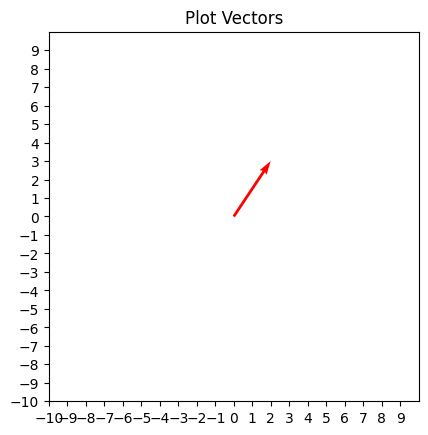

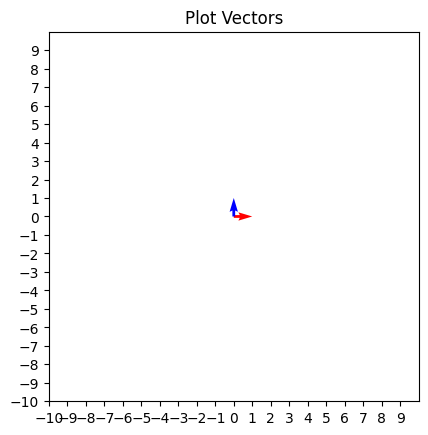

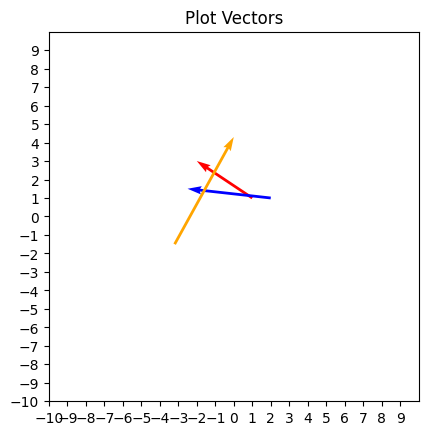

In [4]:
plot_vectors([[0, 0, 2, 3]], ["red"]) # One vector
plot_vectors([[0, 0, 1, 0], [0, 0, 0, 1]], ["red", "blue"]) # Two orthogonal vectors
plot_vectors([[1, 1, -2, 3], [2, 1, -2.5, 1.5], [-3.2, -1.5, 0, 4.3]], ["red", "blue", "orange"]) # Three arbitrary vectors

We know that any 2 linearly independent vectors can form a basis in 2D space. This means that every other vector can be represented as their linear combination. It will be easiest to see this in the standard basis of 2D space.

We start by defining the two basis vectors: $e_1, e_2$. Then, we choose an arbitrary vector $v$. We know that it can be expressed as a linear combination $$ v = \lambda_1e_1 + \lambda_2e_2 $$

Finding the unknown coefficients is the same as solving a linear system with as many equations as there are basis vectors (2 in this case). We can do this by using `np.linalg.solve()`.

**Note:** If you want to write `lambda` in Python for some reason, use the variable name `lamda` since `lambda` is a reserved keyword.

In [5]:
def find_linear_combination_coefficients(e1, e2, v):
    """
    Returns the coordinates of the representation of v in the basis {e_1, e_2}.
    That is, the unknown coefficients in the linear combination v = lambda_1 * e_1 + lambda_2 * e_2
    """

    basis_matrix = np.array([
     [e1[0], e2[0]],
     [e1[1], e2[1]]
    ])

    return np.linalg.solve(basis_matrix, v)

Coefficients:  [3.5 8.6]


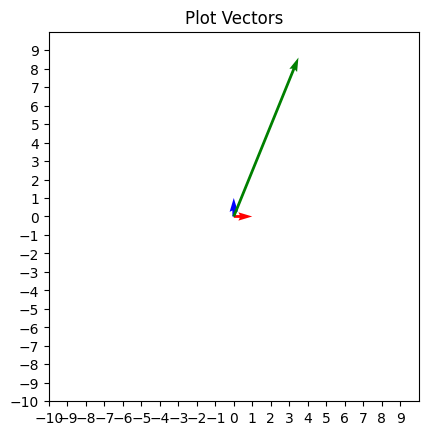

In [6]:
e1, e2 = [[1, 0], [0, 1]]
v = [3.5, 8.6]
# Find the unknown coefficients. Extract the logic in a function.
# It should accept the two basis vectors and the one we need to represent
# and should return the two coefficients
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
# Plot the three vectors
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

The coefficents should be the same as the vector's coordinates. That's because we were extremely careful in choosing a basis.

We know, however, that any pair of linearly independent vectors forms a basis in 2D space. So, let's try this.

Choose two arbitrary vectors (in the code they are `[2, 3]` and `[-5, 1]` but feel free to change them as you wish). Represent $v$ as their linear combination and print the coefficients. After that, plot the resulting vectors to verify visually that the third one is the linear combination of the other two with the coefficients that you saw.

Coefficients:  [2.73529412 0.39411765]


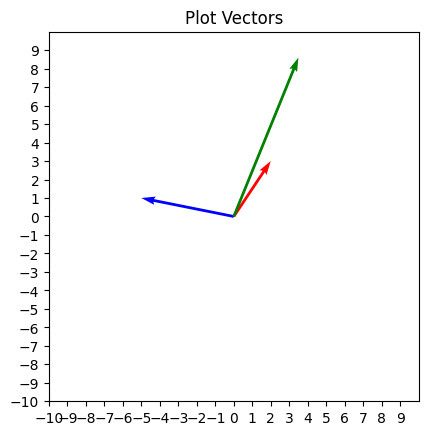

In [7]:
e1, e2 = [[2, 3], [-5, 1]]
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

What we did was **changing the basis**. We represented **the same original vector $v$** in the new coordinates. We didn't change the geometric object $v$ itself; it still looks the same in the plot. We only changed our viewpoint. This is what change of basis is all about: changing viewpoints.

Let's also see what an "orthogonal" basis is: the basis vectors are orthogonal to each other. You can find online how to compute orthogonal vectors but we don't need that. A definition of orthogonal vectors is: a set of two vectors $a, b$ such that $a.b = 0$. One such set of vectors is `[3, 4], [-4, 3]`.

Represent the same vector $v$ in the orthogonal basis.

Coefficients:  [1.796 0.472]


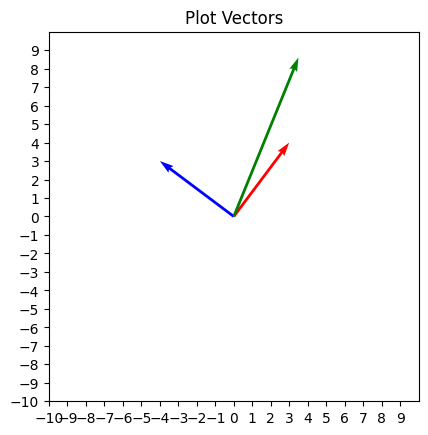

In [8]:
e1, e2 = [[3, 4], [-4, 3]]
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

Let's choose a more visually pleasing basis: one whose basis vectors are **collinear** (parallel) to the coordinate axes.

Coefficients:  [1.72  0.875]


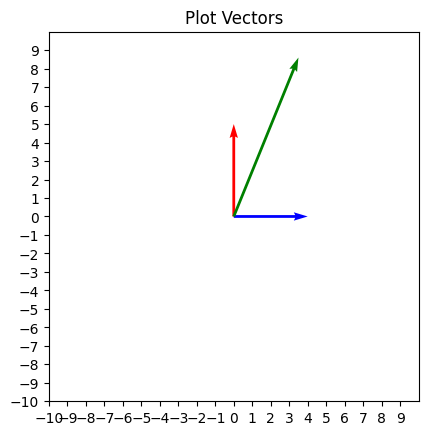

In [9]:
e1, e2 = [[0, 5], [4, 0]]
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

Now you've seen the coordinates of $v$ in different **bases** (plural form of "basis"). You can see that algebra doesn't really care what the basis vectors are. We simply need *some* point of reference.

You can also see the transition from an arbitrary basis, to an orthogonal basis, to an orthonormal basis, to the standard basis (which is orthonormal **AND** aligned to the xy axes). You can also see that the standard basis gives us the easiest possible representation of a vector. That's why it's so useful.

### Problem 2. Vectorization in `numpy`
As programmers, we're used to writing for-loops to iterate over collections. This is quite OK but in Python makes the code slow (because it's an interpreted, dynamically-typed language). For example, a "standard" way of summing an array would be
```python
x = [2, 3, 8, -2.3, 0, 15]
python_sum = 0
for i in range(len(x)):
    python_sum += x[i]
print(python_sum)
```

However, there are better ways to do this. `numpy` works in C "behind the scenes". This means that:
1. Operations in C are very, very, VERY fast
2. Communication between C and Python is slow

This means we should prepare our code to use `numpy` arrays as much as possible. First of all, this gives us a great computational advantage: the code is very fast. Second, it will look simpler and more beautiful. Compare the previous code with this one:
```python
x = [2, 3, 8, -2.3, 0, 15]
numpy_sum = np.sum(x)
print(numpy_sum)
```

Of course, the for-loop is still done, it's just hidden.

The basic rule is **whenever possible, avoid looping and use vectors and matrices**. Sometimes it's impossible to avoid loops and that's OK.

Let's create a performance test. Create a large array of random numbers. You can use `np.random.random()`. Sum the array using `numpy` and using the for-loop. Compare the times. In some cases, the performance difference will be several hundred times (e.g. length = $1.10^7$, difference $\approx 2000$ times: $\approx 0.01ms$ for the `sum()` and $\approx 2s$ for the loop).

Don't forget to see that the sums are equal. A fast but incorrect algorihm is not an option :).

Next, call the function for different lengths and create two plots showing the time it takes to multiply different-length arrays. **Idea:** You can plot them on two separate y-axes on the same plot. Look at the `twiny()` function. See how much time it takes to perform both operations.

Plot another plot: speedup versus length. Plot the length on the x-axis and the speedup (`np_sum_time / for_loop time`) on the y-axis.

In [10]:
def numpy_sum(arr):
    return np.sum(arr)

def python_sum(arr):
    sum = 0
    for i in range(len(arr)):
        sum += arr[i]
    return sum

In [11]:
# Test Functions
arr = [1, -1, 2, 3, 4, -3]
numpy_arr = np.array(arr)
print(numpy_sum(numpy_arr))
print(python_sum(arr))
print(numpy_sum(numpy_arr) == python_sum(arr))

6
6
True


In [12]:
def performance_sums(size):
    arr = np.random.random(size)
    arr_numpy = np.array(arr)
    
    start_time = time.time()
    numpy_sum(arr_numpy)
    np_time = time.time() - start_time

    start_time = time.time()
    python_sum(arr)
    python_time = time.time() - start_time

    return [np_time, python_time]

In [13]:
def plot_performance_sums():
    lengths = np.array([10**i for i in range(1, 8)])
    
    np_times = np.array([])
    loop_times = np.array([])

    for length in lengths:
        times = performance_sums(length)
        np_times = np.append(np_times, times[0])
        loop_times = np.append(loop_times, times[1])

    fig, ax1 = plt.subplots()
    ax1.plot(lengths, np_times, color='blue', label='NumPy sum')
    ax1.plot(lengths, loop_times, color='red', label='For-loop sum')

    ax1.set_xlabel('Array Length')
    ax1.set_ylabel('Time (seconds)')
    ax1.set_xscale('log')
    ax1.set_yscale('log')

    plt.title('Numpy sum vs Python sum')
    ax1.legend()
    plt.show()

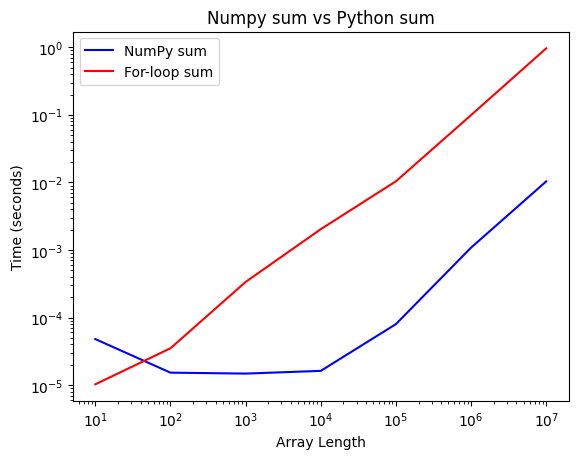

In [14]:
plot_performance_sums()

There's one slight warning to using vectors. If we don't know what we're doing we might get very hard-to-detect bugs.

Let's look at vector multiplication. In algebra we may write:
$$ \begin{bmatrix}
2 \\
3 \\
4
\end{bmatrix}.
 \begin{bmatrix}
5 \\
-2 \\
3
\end{bmatrix}=16$$

This is the same as
$$ \begin{bmatrix}
2 & 3 & 4
\end{bmatrix}.
 \begin{bmatrix}
5 & -2 & 3
\end{bmatrix}=16$$

In vector multiplication, rows and columns don't really matter. However, most of the time we want to use **the matrix convention**: "rows times columns". This means that both products above are undefined. Also, the inner product is
$$ \begin{bmatrix}
2 & 3 & 4
\end{bmatrix}
.
 \begin{bmatrix}
5 \\
-2 \\
3
\end{bmatrix}=16$$

The inverse operation, following our convention, will return a matrix (this is called **outer product**):

$$ \begin{bmatrix}
2 \\
3 \\
4
\end{bmatrix}.
 \begin{bmatrix}
5 & -2 & 3
\end{bmatrix}=
\begin{bmatrix}
10 & -4 & 6 \\
15 & -6 & -9 \\
20 & -8 & 12
\end{bmatrix}$$

Let's compare how the default `numpy` behaviour does and how we can impose our convention.

First, let's create the arrays. Next, multiply them. Everything should look fine... until we look at the shapes of `x` and `y` which are `(3,)`. This kind of array is called **rank-1 array**. The matrix convention **DOES NOT** apply to it. One big error is evident when we try to transpose them.

In [15]:
x = np.array([2, 3, 4])
y = np.array([5, -2, 3])
print("x.y =", str(x.dot(y)))

print("x.shape:", x.shape)
print("y.shape:", y.shape)
print("x:", x)
print("x transpose:", x.T)

x.y = 16
x.shape: (3,)
y.shape: (3,)
x: [2 3 4]
x transpose: [2 3 4]


Transposition **DID NOT** turn our row-vector into a column vector! This is correct but **does not follow the matrix convention**.

How do we follow the matrix convention then? Simple, just represent the vectors as matrices (2D arrays).

In [16]:
x = np.array([[2, 3, 4]]) # Row vector
y = np.array([[5], [-2], [3]]) # Column vector

print("x.shape:", x.shape)
print("y.shape:", y.shape)
print("x.y:\n", x.dot(y)) # Dot product -> still looks like a matrix
print("y.x:\n", y.dot(x)) # Outer product -> matrix

x.shape: (1, 3)
y.shape: (3, 1)
x.y:
 [[16]]
y.x:
 [[10 15 20]
 [-4 -6 -8]
 [ 6  9 12]]


This simple convention can save us a lot of trouble in the future, especially when dealing with more complicated code.

### Problem 3. Visualizing Linear Transformations
Write a code which visualizes a linear transformation. It should show "the old space" and "the new space" imposed on it.

Actually, if you don't want to write the code, I've already provided something for you. The following cell contains the `visualize_transform.py` code from last time. We'll examine it and see how we can use it to show our own transformations.

In [17]:
def visualize_transformation(matrix, plot_title):
    fig = plt.figure()
    plt.axis("equal")
    ax = fig.add_subplot(111)

    # Limits, labels and grid
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1] + 1))
    ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1] + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid()
    ax.set_title(plot_title)

    # Unit vectors
    ax.quiver([0, 0], [0, 0], [1, 0], [0, 1], 
              color = ["red", "blue"], alpha = 0.2, units = "xy", scale = 1)

    # Transformation
    matrix = [
        [matrix[0][0], matrix[0][1], 0],
        [matrix[1][0], matrix[1][1], 0],
        [0, 0, 1],
    ]
    t = Affine2D(matrix)

    [min_x, max_x, min_y, max_y] = [2 * ax.get_xlim()[0], 2 * ax.get_xlim()[1] + 1, 2 * ax.get_ylim()[0], 2 * ax.get_ylim()[1] + 1]

    # New (transformed) grid lines
    # Horizontal
    for y in np.arange(min_y, max_y):
        ax.plot([min_x, max_x], [y] * 2, color = "red", linestyle = "--", linewidth = 2, transform = t + ax.transData)
    # Vertical
    for x in np.arange(min_x, max_x):
        ax.plot([x] * 2, [min_y, max_y], color = "blue", linestyle = "--", linewidth = 2, transform = t + ax.transData)

    # New (transformed) unit vectors
    new_x = t.transform_affine([1, 0])
    new_y = t.transform_affine([0, 1])
    ax.quiver([0, 0], [0, 0], [new_x[0], new_y[0]], [new_x[1], new_y[1]], color = ["red", "blue"], units = "xy", angles = "xy", scale = 1)
   
    plt.show()

The code is mostly "housekeeping" - making the plot look nicer. It basically consits of several parts:
1. Visualize gridlines
2. Create the transformation from the matrix: `t = Affine2D(matrix)`
3. Visualize transformed gridlines

A quirk with `Affine2D()` is that it uses a 3x3 matrix. What's more, the last row is always `[0, 0, 1]`. This is because the third column corresponds to moving (translation) of the entire coordinate system. As you can imagine, this doesn't leave the origin fixed, therefore **translation is not a linear transformation**. It's an affine transformation, which is exactly what the code does. More info [here](https://stackoverflow.com/questions/10698962/why-do-2d-transformations-need-3x3-matrices).
For our purposes, we defined the 2D transformation matrix as:
$$ T=\begin{bmatrix}
a & b \\
c & d
\end{bmatrix} $$
which we'll pass to the function as
$$ T=\begin{bmatrix}
a & b & 0 \\
c & d & 0 \\
0 & 0 & 1
\end{bmatrix} $$

**Note:** If you want to visualize translations, feel free to do so.

Let's see what various transformations look like.

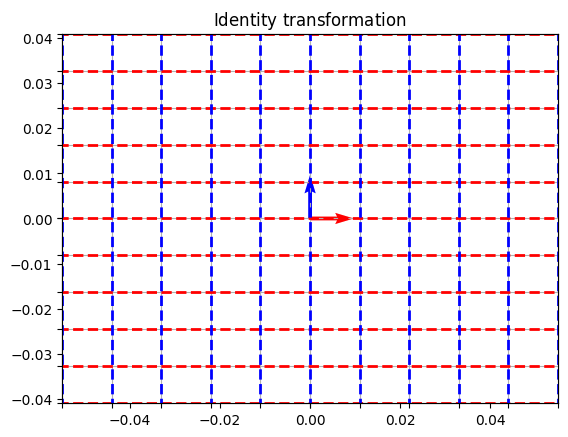

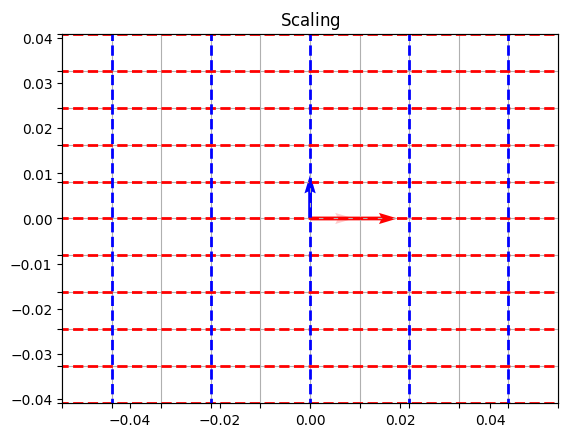

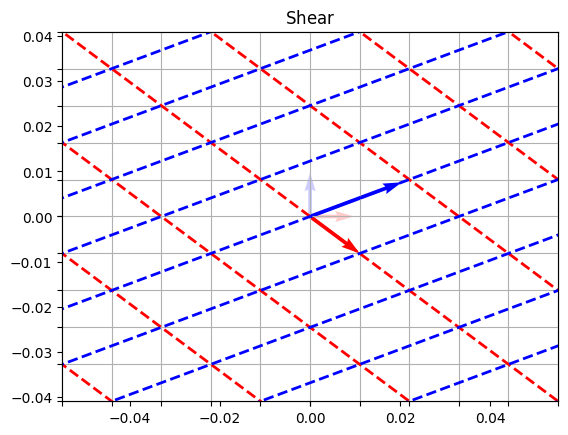

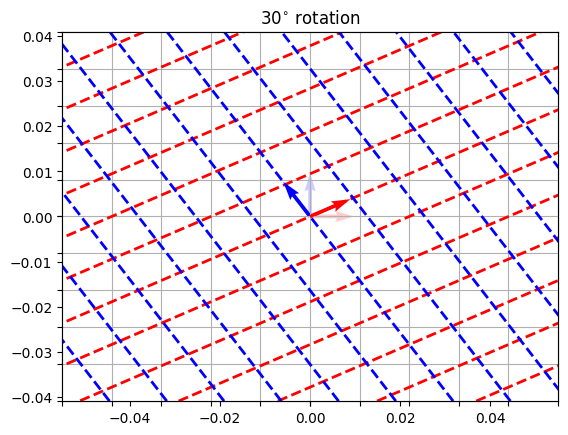

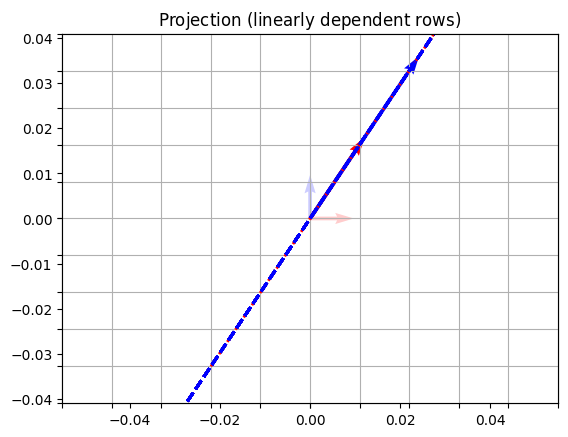

In [18]:
# Identity
matrix = [
    [1, 0],
    [0, 1]
]

visualize_transformation(matrix, r"$\mathrm{Identity\ transformation}$")

# Scaling
matrix = [
    [2, 0],
    [0, 1]
]

visualize_transformation(matrix, r"$\mathrm{Scaling}$")

# Shear
matrix = [
    [1, 2],
    [-1, 1]
]

visualize_transformation(matrix, r"$\mathrm{Shear}$")

# Rotation
matrix = [
    [np.cos(np.radians(30)), -np.sin(np.radians(30))],
    [np.sin(np.radians(30)), np.cos(np.radians(30))]
]

visualize_transformation(matrix, r"$\mathrm{30^{\circ}\ rotation}$")

# Projection (linearly dependent rows)
matrix = [
    [1, 2],
    [2, 4]
]

visualize_transformation(matrix, r"$\mathrm{Projection\ (linearly\ dependent\ rows)}$")

Feel free to experiment with other matrices and to see what transformation they will result in. Also feel free to write better visualization code.

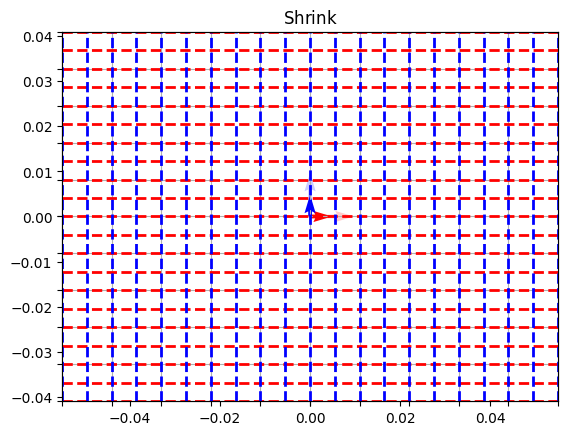

In [19]:
matrix1 = [
    [0.5, 0],
    [0, 0.5]
]

visualize_transformation(matrix1, r"$\mathrm{Shrink}$")

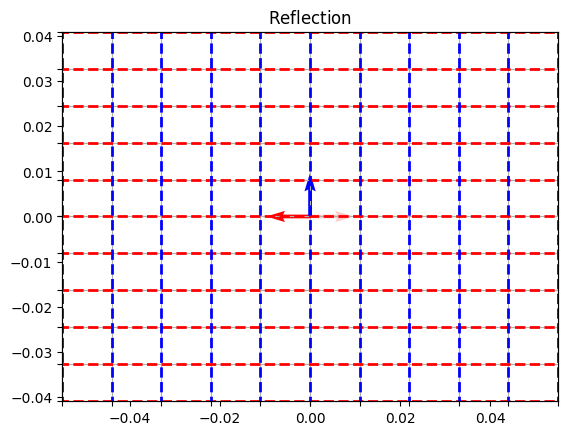

In [20]:
matrix1 = [
    [-1, 0],
    [0, 1]
]

visualize_transformation(matrix1, r"$\mathrm{Reflection}$")

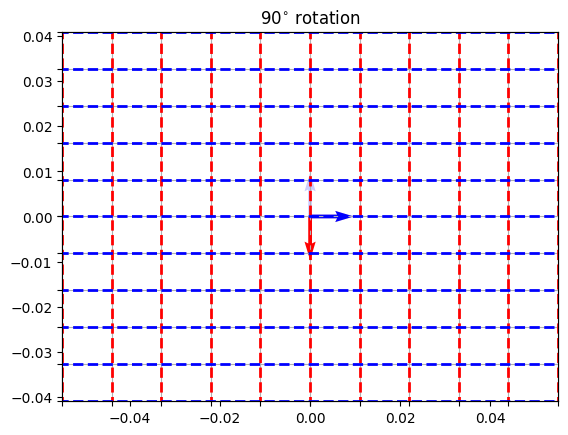

In [21]:
matrix1 = [
    [np.cos(np.pi/2), np.sin(np.pi/2)],
    [ -np.sin(np.pi/2),  np.cos(np.pi/2)]
]

visualize_transformation(matrix1, r"$\mathrm{90^{\circ}\ rotation}$")

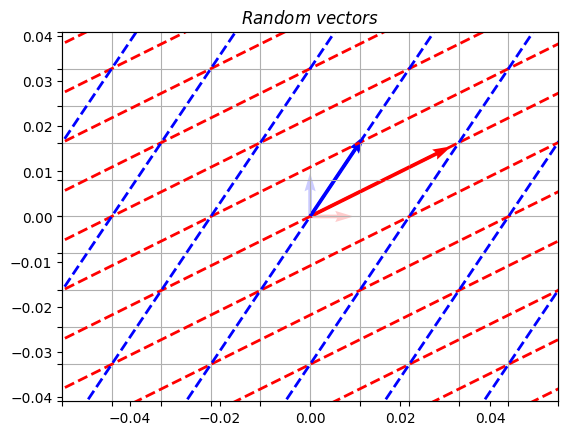

In [22]:
matrix1 = [
    [3, 1],
    [2, 2]
]

visualize_transformation(matrix1, r"$Random \ vectors$")

### Problem 4. Images as Matrices. Image arithmetic
One direct use of matrices and transformations is images. An image is a 2D array (i.e. matrix) of pixels. If it's grayscale, each pixel will be an integer from 0 to 255:
$$ I=\begin{bmatrix}
20 & 45 & 83 & \dots \\
38 & 182 & 200 & \dots \\
\dots & \dots & \dots & \dots \\
\end{bmatrix} $$

In an RGB image, each pixel contains three values, corresponding to $R$, $G$ and $B$.

A bigger number means more brightness in the corresponding channel, for example `[255, 0, 0]` is a completely red pixel. `[0, 0, 0]` is a black pixel, and `[255, 255, 255]` is a white pixel.

Because we treat images as matrices, we can peform arithmetic operations on them.

To show an image, you can use `plt.imshow()`.

#### Opening an image from the Internet
This one proves not to be easy. However, there's a library for working with images called `scikit-image` which solves most of our problems. Even better, it returns a `numpy` array, which is perfect for us.

In [23]:
def read_image(url):
    img = skimage.io.imread(url)
    return img

In [24]:
cat_image_url = "https://d17fnq9dkz9hgj.cloudfront.net/uploads/2012/11/140272627-grooming-needs-senior-cat-632x475.jpg"
cat_image = read_image(cat_image_url)

In [25]:
cat_image[0][0] # First pixel

array([35, 55,  4], dtype=uint8)

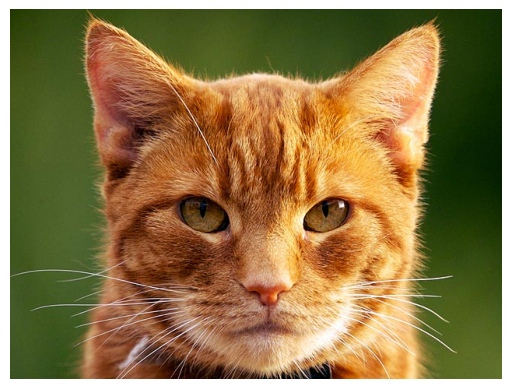

In [26]:
plt.imshow(cat_image)
plt.axis("off")
plt.show()

In most cases, it's useful to treat the channels one by one.

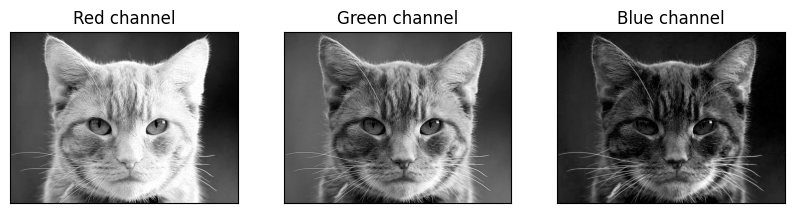

In [27]:
cat_image_r, cat_image_g, cat_image_b = [cat_image[:, :, i] for i in range(3)]
f, (ax_r, ax_g, ax_b) = plt.subplots(1, 3, figsize = (10, 5))
ax_r.imshow(cat_image_r, cmap = "gray")
ax_r.set_title("Red channel")
ax_g.imshow(cat_image_g, cmap = "gray")
ax_g.set_title("Green channel")
ax_b.imshow(cat_image_b, cmap = "gray")
ax_b.set_title("Blue channel")
plt.setp([ax_r, ax_g, ax_b], xticks = [], yticks = []) # Remove axis ticks
plt.show()

If we simply add the channels together, without making them red, green or blue, we'll get a grayscale image. Note that this doesn't appear very pleasing. This is because the human eye perceives different colors differently.

Note that we first need to "normalize" each channel, that is, divide by 255. This will rescale all values. Instead of $[0; 255]$, they'll be in the range $[0; 1]$.

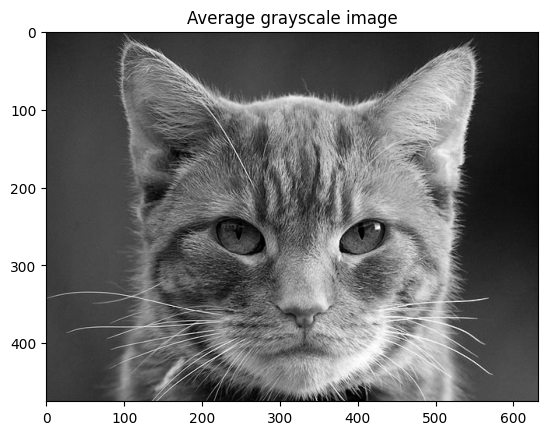

In [28]:
cat_image_r_normalized, cat_image_g_normalized, cat_image_b_normalized = [
    channel / 255 for channel in [cat_image_r, cat_image_g, cat_image_b]
] 
cat_image_gray = (cat_image_r_normalized + cat_image_g_normalized + cat_image_b_normalized) / 3.0  
plt.imshow(cat_image_gray, cmap = "gray")
plt.title("Average grayscale image")
plt.show()

The eye is more sensitive to greens than reds or blues. There are several ways to apply that correction, but we'll use [this one](https://stackoverflow.com/questions/14330/rgb-to-monochrome-conversion). This is called **luminance correction** (or **gamma correction**).

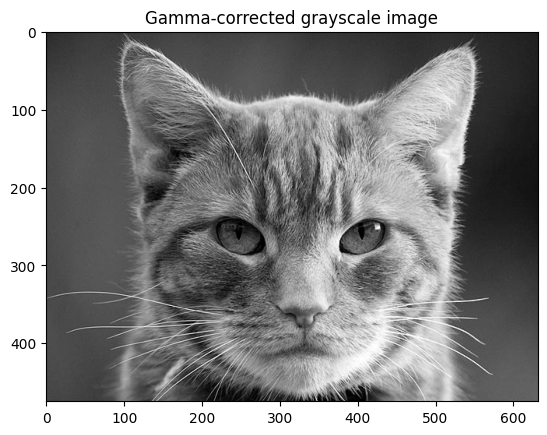

In [29]:
cat_image_gray_corrected = (0.299 * cat_image_r_normalized + 
                            0.587 * cat_image_g_normalized + 
                            0.114 * cat_image_b_normalized)
plt.gca().imshow(cat_image_gray_corrected, cmap = plt.cm.gray)
plt.title("Gamma-corrected grayscale image")
plt.show()

If we want to create an artistic grayscale image, we can always change the coefficients. Feel free to experiment with this.

So, there we go. We just performed matrix operations on images. Later, we'll talk about matrix multiplication and convolution, which is a very cool way of processing images.

For the time being, let's just try one more thing. The **image histogram** will give us information of how bright our image is. On the x-axis, there are pixel values from 0 to 255. On the y-axis, there is the count of all values, for example 10 pixels with value 0, 30 pixels with value 1 and so on.

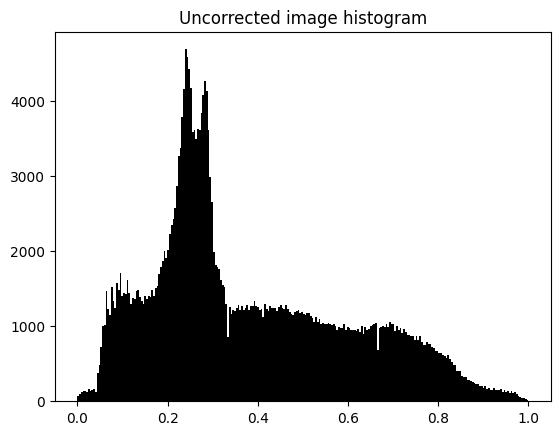

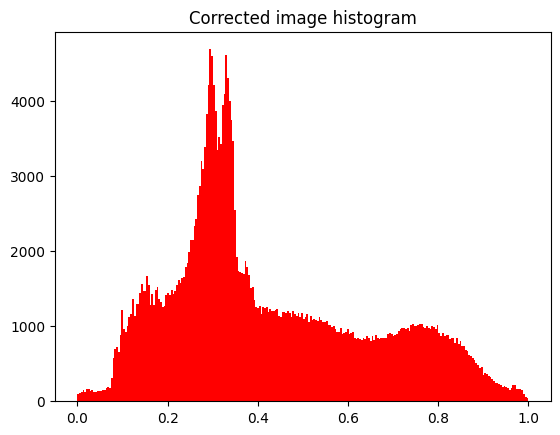

In [30]:
plt.hist(cat_image_gray.ravel(), bins = 256, color = "black")
plt.title("Uncorrected image histogram")
plt.show()
plt.hist(cat_image_gray_corrected.ravel(), bins = 256, color = "red")
plt.title("Corrected image histogram")
plt.show()

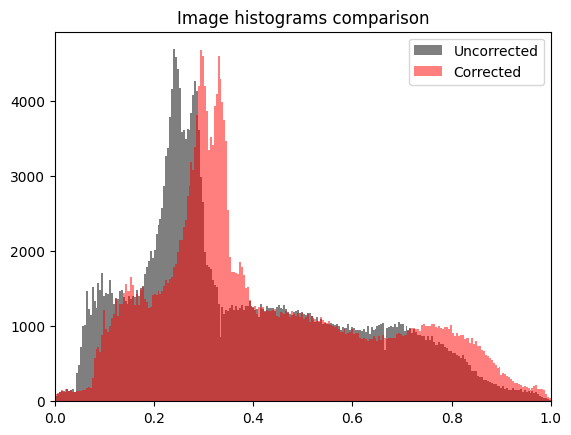

In [31]:
# Represent the image as a single-dimensional vector
hist_vector = cat_image_gray.ravel()

# Normalize the image to have values in the range [0; 1]
hist_vector = hist_vector / (hist_vector.max() - hist_vector.min())

plt.hist(hist_vector, bins = 256, color = "black", alpha = 0.5, label = "Uncorrected")
plt.hist(cat_image_gray_corrected.ravel(), bins = 256, color = "red", alpha = 0.5, label = "Corrected")
plt.xlim(0, 1)
plt.title("Image histograms comparison")
plt.legend()
plt.show()

**Your turn.** Using the code above, display each image channel (1 row, 3 columns). Below each channel, show the histogram corresponding to that channel. Use the previous code pieces as a reference.

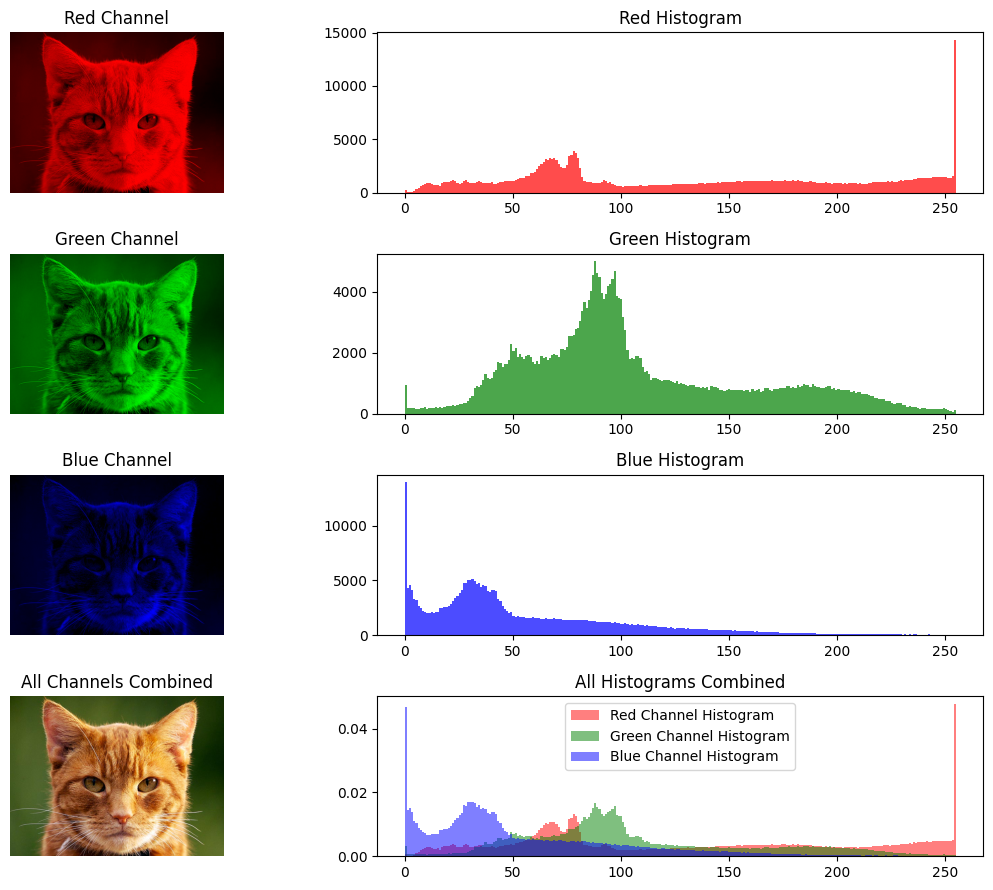

In [63]:
cat_image_r, cat_image_g, cat_image_b = [cat_image[:, :, i] for i in range(3)]

red_image = np.zeros_like(cat_image)
green_image = np.zeros_like(cat_image)
blue_image = np.zeros_like(cat_image)

red_image[:, :, 0] = cat_image_r
green_image[:, :, 1] = cat_image_g
blue_image[:, :, 2] = cat_image_b

fig, axes = plt.subplots(4, 2, figsize=(12, 9))

axes[0, 0].imshow(red_image)
axes[0, 0].set_title("Red Channel")
axes[0, 0].axis('off')

hist_r = red_image[:, :, 0].ravel()
axes[0, 1].hist(hist_r, bins=256, color='red', alpha=0.7)
axes[0, 1].set_title("Red Histogram")

axes[1, 0].imshow(green_image)
axes[1, 0].set_title("Green Channel")
axes[1, 0].axis('off')

hist_g = green_image[:, :, 1].ravel()
axes[1, 1].hist(hist_g, bins=256, color='green', alpha=0.7)
axes[1, 1].set_title("Green Histogram")

axes[2, 0].imshow(blue_image)
axes[2, 0].set_title("Blue Channel")
axes[2, 0].axis('off')

hist_b = blue_image[:, :, 2].ravel()
axes[2, 1].hist(hist_b, bins=256, color='blue', alpha=0.7)
axes[2, 1].set_title("Blue Histogram")

combined_image = np.dstack((cat_image_r, cat_image_g, cat_image_b))
axes[3, 0].imshow(combined_image)
axes[3, 0].set_title("All Channels Combined")
axes[3, 0].axis('off')

axes[3, 1].hist(hist_r, bins=256, color='red', alpha=0.5, label='Red Channel Histogram', density=True)
axes[3, 1].hist(hist_g, bins=256, color='green', alpha=0.5, label='Green Channel Histogram', density=True)
axes[3, 1].hist(hist_b, bins=256, color='blue', alpha=0.5, label='Blue Channel Histogram', density=True)
axes[3, 1].set_title("All Histograms Combined")
axes[3, 1].legend()

plt.tight_layout()
plt.show()


### * Problem 5. Perspective Correction
Let's now look at transformations. A **homography** is a function that maps a pixel from one image onto a pixel from another image.

If a camera looks at an image, it can see a tilted, slanted and rotated version of the same image. It's easier to show than to tell:

<img src="perspective.gif" />

The camera sees a **transformed** version of the original image. Note, however, those things:
1. There's no translation (or if there is, it's irrelevant)
2. All lines in the object are lines in the image
3. Lines remain parallel and equally spaced

This means that the camera sees a **linear transformation** of the original object.

This transformation maps 2D space to 2D space which means its determinant is not zero. Which, in turn, means that we can **invert** the transformation matrix and see what the original image looks like.

We just transferred a problem in image processing to a problem in linear algebra.

This kind of processing has many uses. It allows us to align multiple images, it's also very useful in OCR (optical character recognition) software... and basically, it's a way to **standardize different perspectives**.

Since we are in 2D space, we need to find 2 basis vectors and then specify how we want to transform them.

Follow [this tutorial](http://www.learnopencv.com/homography-examples-using-opencv-python-c/) on OpenCV, a library for computer vision. You'll need to install it first.

**Note:** You can use the `read_image()` function to read the image, and `plt.imshow()` instead of `cv.imshow()`. It's simpler to use `OpenCV` just for finding the perspective correction matrix.

For more information about linear transformations on images in OpenCV, you can have a look at [this tutorial](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations).

In [99]:
def perspective_correction(image):
    height, width = image.shape[:2]
    src_points = np.float32([[width // 4, height // 4],
                             [width // 2, height // 3],
                             [width // 3, height // 2],
                             [width // 2, height // 1.5]])
    dst_points = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
    homography_matrix, _ = cv2.findHomography(src_points, dst_points)
    corrected_image = cv2.warpPerspective(image, homography_matrix, (width, height))
    return corrected_image

def draw_points(image, points):
    for point in points:
        cv2.circle(image, tuple(point.astype(int)), 10, (0, 0, 255), -1)
    return image

def display_image(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def read_image(image_path):
    return cv2.imread(image_path)

def read_correct_and_display_image(image_path):
    image = read_image(image_path)
    height, width = image.shape[:2]
    src_points = np.float32([[width // 4, height // 4],
                             [width // 2, height // 3],
                             [width // 3, height // 2],
                             [width // 2, height // 1.5]])
    image_with_points = draw_points(image.copy(), src_points)
    display_image(image_with_points, 'Source Points')
    corrected_image = perspective_correction(image)
    display_image(image, 'Original Image')
    display_image(corrected_image, 'Corrected Image')


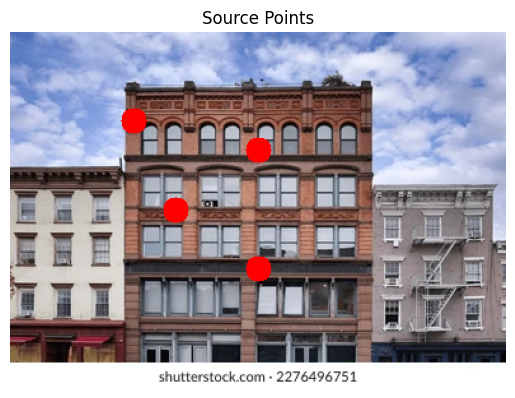

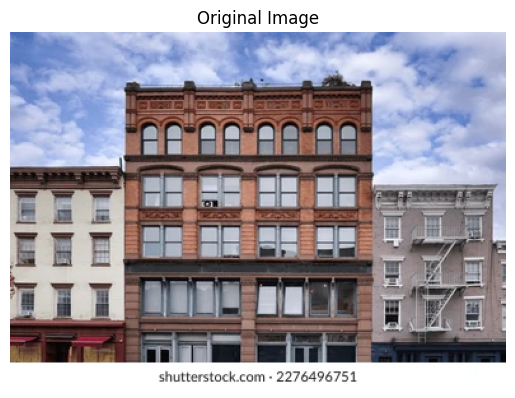

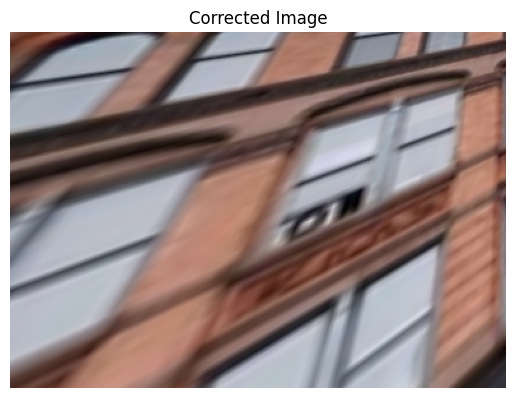

In [100]:
image_path = 'building.jpg'
read_correct_and_display_image(image_path)

### * Problem 6. Eigenvalues and Eigenvectors
Some transformations are special. Let's examine this visually.

Modify the code in the transformation visualization example. Instead of the two basis vectors, it should now accept **a vector as a parameter** and it should show that vector in the old and new coordinates. This should be simple enough to do :).

In [163]:
def visualize_transformed_vector(matrix, vec, title):
    """
    Shows the vector (starting at (0; 0)) before and after the transformation
    given by the specified matrix
    """

    plt.figure(figsize=(15, 15)) 
    plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color="red")

    transform = matrix

    homogeneous_vec = [vec[0], vec[1], 1]
    transformed_vec = [sum(a*b for a,b in zip(transform_row, homogeneous_vec)) for transform_row in transform]

    plt.quiver(0, 0, transformed_vec[0], transformed_vec[1], angles='xy', scale_units='xy', scale=1, color="blue")

    plt.xlim(-20, 20)
    plt.ylim(-20, 20)
    
    plt.xticks(np.arange(-20, 21, 1))
    plt.yticks(np.arange(-20, 21, 1))
    
    plt.grid()
    plt.gca().set_aspect('equal')
    plt.title(title)
    plt.show()

Now have a look at the matrix given below:
$$ T = \begin{bmatrix}
2 & -4 \\
-1 & -1
\end{bmatrix} $$

See how the transformation acts on a arbitrary vector:

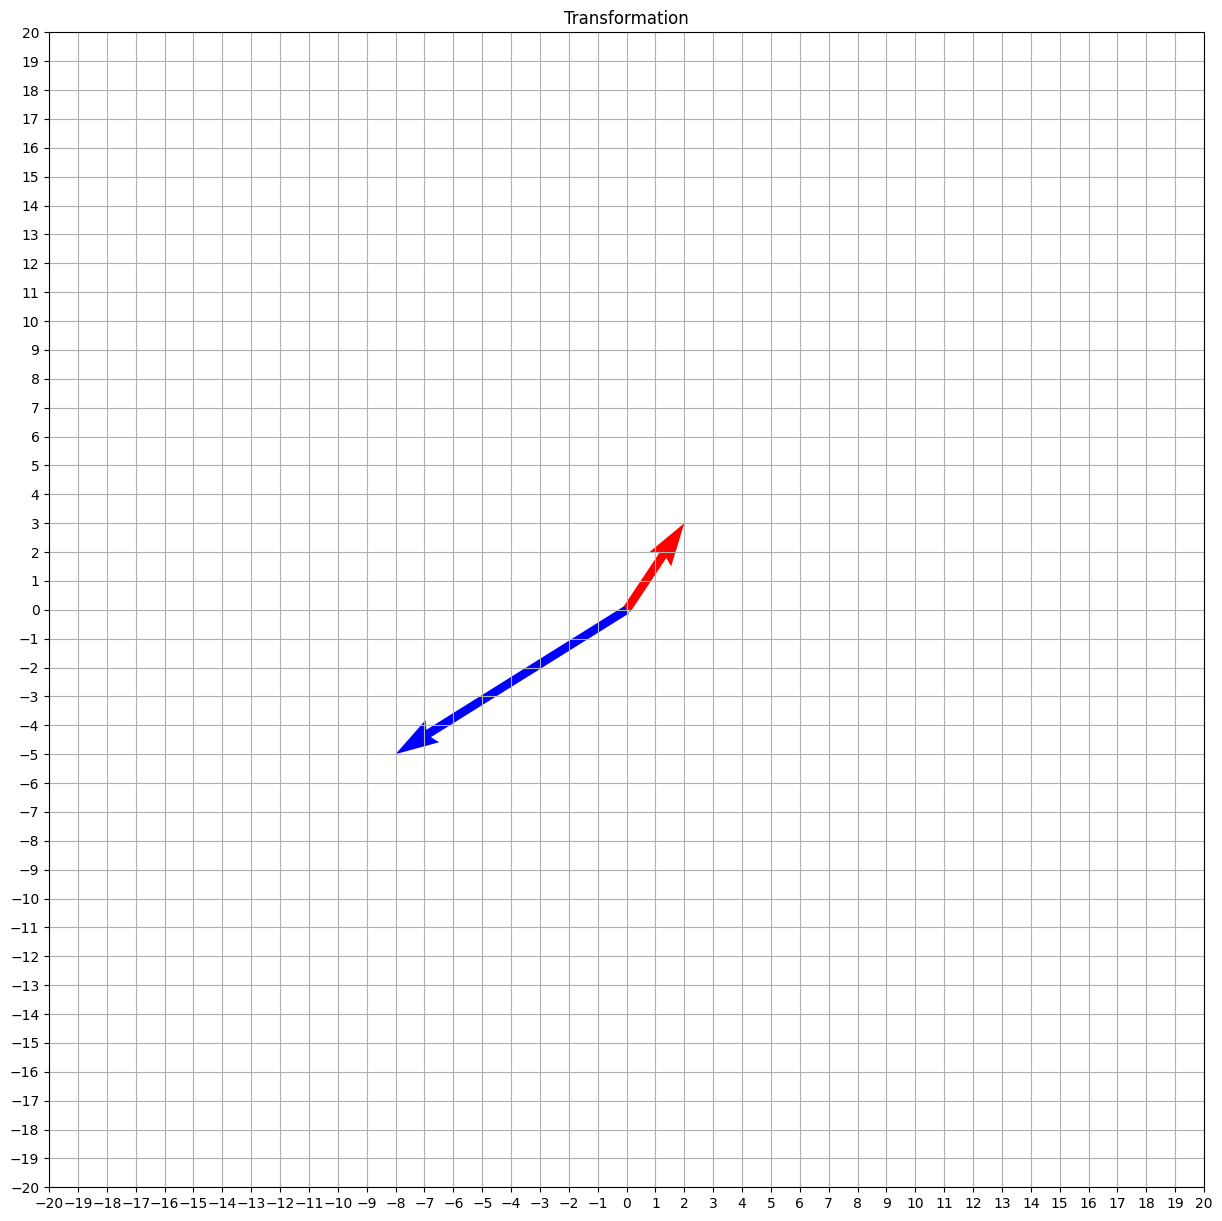

In [164]:
matrix = np.array([[2, -4, 0], [-1, -1, 0], [0, 0, 1]])
visualize_transformed_vector(matrix, [2, 3], "Transformation")

Well, it... transforms it somehow. Let's try another vector:

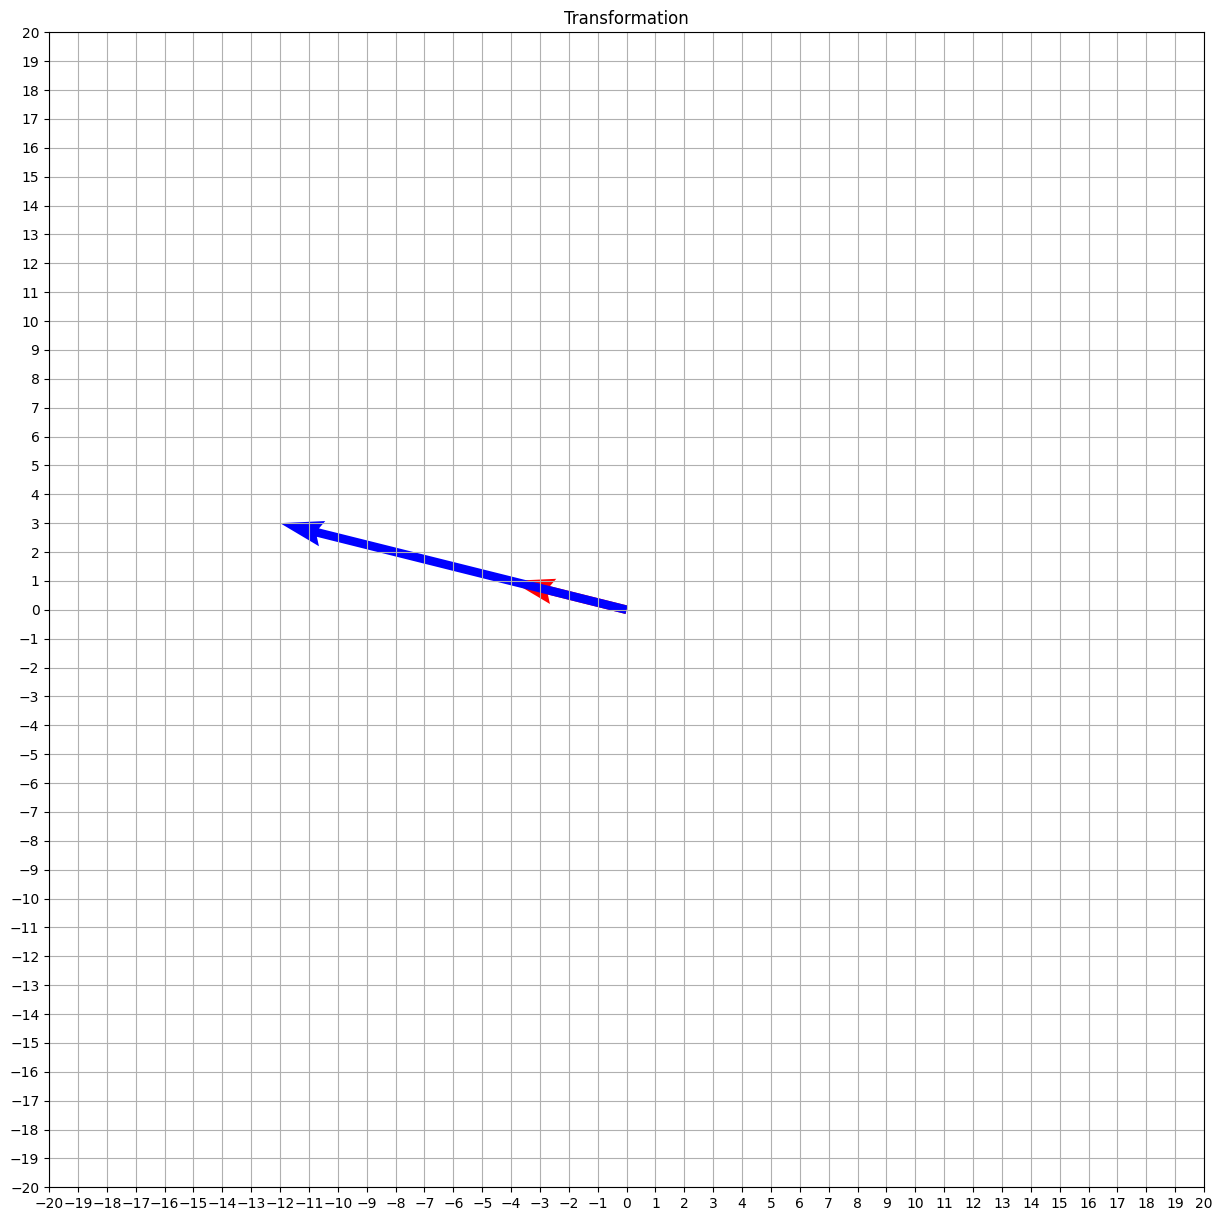

In [165]:
visualize_transformed_vector(matrix, [-4, 1], "Transformation")

Hm... the vector should be **scaled only**. That is, the entire matrix multiplication acts like a scalar multiplication for this special vector. Because it's so special, it's given a name - it's an **eigenvector** of that matrix. The factor which scales it is called an **eigenvalue** corresponding to that eigenvector.

More formally, a vector $v$ is an eigenvector of the matrix $A$, corresponding to the eigenvalue $\lambda$ if
$$ Av = \lambda v $$

You can find more details about the computation [here](https://www.calvin.edu/~scofield/courses/m256/materials/eigenstuff.pdf).

Why are these useful? For example, all of quantum physics is based on eigenvalues and eigenvectors. Also, it's very useful in **dimensionality reduction** problems. If you wish, you can explore that (for example, the principal component analysis algorithm).

### ** Problem 7. Principal Component Analysis
Sometimes a projection of a higher-dimensional to a lower-dimensional space is useful. It's extremely useful if we want to get some visual understanding of a, say, 15D space, in 3D or even 2D. One algorithm which allows us to project multidimensional data into fewer dimensions **while keeping the most important shapes and structures** is called **principal component analysis** (PCA). You can explore this using the following checklist:
* What are eigenvalues and eigenvectors?
* What is the eigenbasis? What is the spectrum of a matrix?
* How do we compute the eigenvalues and eigenvectors of a matrix?
* What is projection?
* How does projection conserve some shapes? Think about an object casting a shadow
* How is the projection problem related to eigenvalues and eigenvectors?
* What is PCA?
* What are principal components? How many components are there (as a function of dimensions of the original space)?
* What is variance? What is explained variance?
* How do principal components relate to explained variance?
* How is PCA implemented? Implement and show
* Show some applications of PCA, e.g. reducing a 3D image to its first 2 principal components, plotting the 3D and 2D images
* Show a practical use of PCA, for example, trying to see features in a 15D space, projected in 3D.

## Eigenvectors, Eigenvalues an Principal Component Analisys

### Abstract
Principal Component Analysis (PCA) is a fundamental technique in data science and machine learning, widely used for dimensionality reduction, noise reduction, and data visualization. This article introduces PCA explaining key concepts such as variance, principal components, eigenvalues, and covariance matrices. We explore how PCA identifies the most informative directions in high-dimensional data and use these to simplify complex datasets without significant loss of information. Also, we demonstrate PCA in practice using Python.

### 1. Eigenvectors and Eigenvalues

Eigenvectors and eigenvalues are fundamental concepts in linear algebra that help us understand how matrices (which represent transformations) affect vectors. For a square matrix A, an eigenvector $ \vec{v} $ is a special kind of vector that, when we multiply it by the matrix A, doesn’t change direction - it only gets stretched or shrunk by a number called the eigenvalue 
$ \lambda $. This relationship is written as:

$$ \text{A}\vec{v} = \lambda \vec{v} $$

For example:
 
Let $ \text{A} $ = $ \begin{bmatrix}
-6 & 3 \\
 4 & 5
\end{bmatrix} $
and
$ \vec{v} = \begin{bmatrix}
1 \\
4 \end{bmatrix} $

We compute $ \text{A} \vec{v} $ :

$ A\vec{v} = 
\begin{bmatrix}
-6 & 3 \\ 
4 & 5 
\end{bmatrix}
\begin{bmatrix}
1 \\
4
\end{bmatrix}
=
\begin{bmatrix}
(-6)(1) + (3)(4) \\
(4)(1) + (5)(4)
\end{bmatrix}
=
\begin{bmatrix}
6 \\
24
\end{bmatrix}
= 6\vec{v} $

This means that $ \vec{v} $ is an eigenvector of $ \text{A} $ , and the corresponding eigenvalue is $ \lambda $ = 6, because multiplying $ \text{A} $ by $ \vec{v} $ gives the same vector scaled by 6.

Eigenvectors point in directions that remain unchanged by a transformation (except for stretching or flipping). Eigenvalues tell us how much the eigenvector is stretched or flipped:

1. $\lambda = 1$: the vector stays with the same length
2. $\lambda = 2$: the vector doubles in length
3. $\lambda = -1$: the vector flips direction

There can be multiple eigenvectors and eigenvalues for a matrix. Eigenvectors exist in higher dimensions too, like 3D or even 1210D. Eigenvalues are often real, but they can be complex numbers, especially for transformations involving rotation.

### 2. Why Eigen?

The term "eigen" comes from the German language, where it means "own" or "typical". In the context of eigenvectors and eigenvalues, it is used to propose the idea of something that is "own" to the transformation represented by the matrix. Sometimes, "eigen" is translated as "characteristic", as in "characteristic vector" and "characteristic value", referring to how the eigenvectors and eigenvalues are characteristic to the matrix itself — they describe properties that are unique to the transformation represented by that matrix.

### 3. Purposes of Eigenvectors and Eigenvalues
Eigenvectors and eigenvalues have several practical applications, especially when working with matrices, which represent transformations in space. Some key purposes include:

1) Transformations in Computer Graphics:

    In computer graphics, matrices are commonly used to perform various transformations, such as scaling, rotating, and translating objects in space. Eigenvectors help us understand the behavior of these transformations because they represent directions in space that are not altered (except for stretching or shrinking)
2) Principal Component Analysis (PCA):

    One of the most powerful applications of eigenvectors is in Principal Component Analysis (PCA), which is widely used in data science and machine learning. PCA uses eigenvectors to find the principal components of a dataset — the directions in which the data varies the most.
3) Stability Analysis in Systems and Physics:
    Eigenvalues and eigenvectors are also used in stability analysis of physical systems, such as in engineering and physics. 

### 4. Eigenbasis
An eigenbasis is a set of eigenvectors of a particular matrix that satisfy the following conditions:

Linearly Independent: The eigenvectors in the set are linearly independent, meaning no eigenvector in the set can be written as a linear combination of the others. This ensures that each eigenvector adds unique information to the basis.

Span the Entire Vector Space: The eigenvectors in the eigenbasis must span the entire vector space of the matrix, meaning they can be combined to represent any vector in that space. For an $ n \times n $ matrix, these eigenvectors must span 
$ \mathbb{R}^n $ , the $ \text{n} $-dimensional space.

If we can find $ \text{n} $ linearly independent eigenvectors for an $ n \times n $ matrix, then these eigenvectors form a basis for the vector space. This set of eigenvectors is called the eigenbasis.

### 5. Characteristic equation
The characteristic equation is essential for finding the eigenvalues of a matrix. To compute the eigenvalues $ \lambda $, we solve the determinant of $ \text{A} - \lambda \text{I} $ ($ \text{A} $ is the matrix and $ \text{I} $ is the identity matrix) equal to zero:

$$ \det(A - \lambda I) = 0 $$ 

How is it derived?

We start with the definition of eigenvalues and eigenvectors:
$$ \text{A}\vec{v} = \lambda \vec{v} $$
To solve for the eigenvalues $ \lambda $, we rearrange the equation as:
$$ \text{A}\vec{v} - \lambda \vec{v} = 0 $$
Next, we factor out the vector $ \vec{v} $:

$ (\text{A} - \lambda)\vec{v} = 0 $ = 

$ (\text{A} - \lambda \text{I})\vec{v} = 0 $ ($ \text{I} $ is the same as 1)

This equation says that the vector $ \vec{v} $ must lie in the null space of the matrix $ \text{A} - \lambda \text{I} $. For nontrivial solutions (i.e., nonzero eigenvectors), the matrix $ \text{A} - \lambda \text{I} $ must be singular, meaning that it does not have an inverse. The condition for singularity is that the determinant of $ \text{A} - \lambda \text{I} $ is zero. Therefore, we set the determinant of $ \text{A} - \lambda \text{I} $ equal to zero:

$$ \det(A - \lambda I) = 0 $$ 
This is the characteristic equation. It is a polynomial equation in $ \lambda $, and the solutions to this equation are the eigenvalues of the matrix $ \text{A} $.

For example:

Let’s revisit the matrix $ \text{A} $ from the earlier example:

$ \text{A} $ = $ \begin{bmatrix}
-6 & 3 \\
 4 & 5
\end{bmatrix} $

To form the matrix $ \text{A} - \lambda \text{I} $ we subtract $ \lambda \text{I} $ from $ \text{A} $:

$ \text{A} - \lambda I = \begin{bmatrix} -6 & 3 \\ 4 & 5 \end{bmatrix} - \lambda \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = \begin{bmatrix} -6 - \lambda & 3 \\ 4 & 5 - \lambda \end{bmatrix}
 $

In this way, the matrix $ \text{A} - \lambda \text{I} $ becomes:

$ A - \lambda I = \begin{bmatrix} -6 - \lambda & 3 \\ 4 & 5 - \lambda \end{bmatrix}
 $

Next, we compute the determinant of the matrix $ (A - \lambda I) $. The determinant of a $ ( 2 \times 2) $ matrix 
$ \begin{bmatrix} 
a & b \\ 
c & d 
\end{bmatrix} $ is given by
$ \det \begin{bmatrix} 
a & b \\ 
c & d 
\end{bmatrix} = ad - bc $:

$ \det(A - \lambda I) = (-6 - \lambda)(5 - \lambda) - (3)(4) $

=

$ ((-6)(5) + (-6)(-\lambda) + (-\lambda)(5) + (-\lambda)(-\lambda)) - 12
= (-30 + 6\lambda - 5\lambda + \lambda^2) - 12
= \lambda^2 + \lambda - 42 = 0 $

Now, we solve the quadratic equation:

$ \lambda^2 + \lambda - 42 = 0 $

We can solve this using the quadratic formula:

$ \lambda_{1,2} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $

$ \lambda_1 = \frac{-1 + \sqrt{169}}{2} = \frac{-1 + 13}{2} = 6 $

$ \lambda_2 = \frac{-1 - \sqrt{169}}{2} = \frac{-1 - 13}{2} = -7 $

The eigenvalues of the matrix $A$ are $\lambda_1 = 6$ and $\lambda_2 = -7$. This characteristic equation provides the values that represent how the matrix scales its corresponding eigenvectors during the transformation.

### 6. How to find eigenvectors of a matrix?
When you have the eigenvalues of a matrix, you can find the corresponding eigenvectors by solving a system of linear equations derived from the following equation:

$$ \text{A}\vec{v} = \lambda \vec{v} $$

= $$ (\text{A} - \lambda \text{I}) \vec{v} = 0 $$

Steps to Find Eigenvectors:
1. Substitute the eigenvalue $\lambda$ into the equation $(A - \lambda I) \vec{v} = 0$.
2. Solve the resulting system of linear equations to find the eigenvector $\vec{v}$.

For example:

We reuse our matrix:

$A$ = $ \begin{bmatrix}
-6 & 3 \\
 4 & 5
\end{bmatrix} $

We know that eigenvalues are $\lambda_1 = 6$ and $\lambda_2 = -7$.

Now, we find the corresponding eigenvectors for each eigenvalue.

For $\lambda_1 = 6$:

Substitute $\lambda = 6$ into the equation $(A - \lambda I) \vec{v} = 0$:

$A - 6I = \begin{bmatrix} -6 & 3 \\ 4 & 5 \end{bmatrix} - \begin{bmatrix} 6 & 0 \\ 0 & 6 \end{bmatrix} = \begin{bmatrix} -12 & 3 \\ 4 & -1 \end{bmatrix}$

Now, solve the system:

$\begin{bmatrix} -12 & 3 \\ 4 & -1 \end{bmatrix} \begin{bmatrix} v_x \\ v_y \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$

This gives us two equations:

$-12v_x + 3v_y = 0$

$4v_x - v_y = 0$

From the second equation:

$v_y = 4v_x$

Substitute this into the first equation:

$-12v_x + 3(4v_x) = 0$

$-12v_x + 12v_x = 0$

This simplifies to:

$0 = 0$

which is always true, indicating that $v_y = 4v_x$. Thus, one eigenvector for example corresponding to $\lambda_1 = 6$ is:

$\vec{v_1} = \begin{bmatrix} 1 \\ 4 \end{bmatrix}$

For $\lambda_2 = -7$:

Substitute $\lambda = -7$ into the equation $(A - \lambda I) \vec{v} = 0$:

$A + 7I = \begin{bmatrix} -6 & 3 \\ 4 & 5 \end{bmatrix} + \begin{bmatrix} 7 & 0 \\ 0 & 7 \end{bmatrix} = \begin{bmatrix} 1 & 3 \\ 4 & 12 \end{bmatrix}$

Now, solve the system:

$\begin{bmatrix} 1 & 3 \\ 4 & 12 \end{bmatrix} \begin{bmatrix} v_x \\ v_y \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$

This gives us two equations:

$v_x + 3v_y = 0$

$4v_x + 12v_y = 0$

From the first equation:

$v_x = -3v_y$

Substitute this into the second equation:

$4(-3v_y) + 12v_y = 0$

$-12v_y + 12v_y = 0$

This simplifies to:

$0 = 0$

which is always true, indicating that $v_x = -3v_y$. Thus, one eigenvector for example corresponding to $\lambda_2 = -7$ is:

$\vec{v_2} = \begin{bmatrix} -3 \\ 1 \end{bmatrix}$


### 7. Why do we use eigenbasis?

If a matrix $A$ has an eigenbasis, it can be diagonalized. This means that the matrix can be represented as a product of three matrices:

$$ A=PDP^{−1} $$

Where:

$P$ is a matrix whose columns are the eigenvectors of $A$ (the eigenbasis).

$𝐷$ is a diagonal matrix whose diagonal entries are the eigenvalues of $A$

$𝑃^{-1}$ is the inverse of matrix $P$

The diagonalization of a matrix is useful because diagonal matrices are much easier to work with. Operations such as matrix powers, exponentiation, or finding matrix functions are simpler when the matrix is diagonalized. This process is used in areas like solving systems of differential equations, physics simulations, and data compression, as well as machine learning techniques such as Principal Component Analysis (PCA).

For example:

We use out matrix:

$A$ = $ \begin{bmatrix}
-6 & 3 \\
 4 & 5
\end{bmatrix} $

We know that eigenvalues are $\lambda_1 = 6$ and $\lambda_2 = -7$.

We know the eigenvectors:

$\vec{v_1} = \begin{bmatrix} 1 \\ 4 \end{bmatrix}$

$\vec{v_2} = \begin{bmatrix} -3 \\ 1 \end{bmatrix}$

Now, we build matrices $P$ and $D$:

$P$ is the matrix with eigenvectors as columns:

$P = \begin{bmatrix} 1 & -3 \\ 4 & 1 \end{bmatrix}$

$D$ is the diagonal matrix of eigenvalues, in the same order:

$D = \begin{bmatrix} 6 & 0 \\ 0 & -7 \end{bmatrix}$

Now let’s verify the diagonalization:

$A = PDP^{-1}$

To compute this, we first find $P^{-1}$ (the inverse of $P$):

$P = \begin{bmatrix} 1 & -3 \\ 4 & 1 \end{bmatrix}$

The determinant of $P$ is:

$\det(P) = (1)(1) - (-3)(4) = 1 + 12 = 13$

Then the inverse of $P$ is:

$P^{-1} = \frac{1}{13} \begin{bmatrix} 1 & 3 \\ -4 & 1 \end{bmatrix}$

Now multiply:

$PDP^{-1} = \begin{bmatrix} 1 & -3 \\ 4 & 1 \end{bmatrix} \begin{bmatrix} 6 & 0 \\ 0 & -7 \end{bmatrix} \cdot \frac{1}{13} \begin{bmatrix} 1 & 3 \\ -4 & 1 \end{bmatrix}$

You can verify that this equals:

$A = \begin{bmatrix} -6 & 3 \\ 4 & 5 \end{bmatrix}$

So, we have successfully diagonalized the matrix $A$ using its eigenbasis!

### 8. Spectrum of a matrix

The spectrum of a matrix refers to the set of all eigenvalues of that matrix. In other words, it is the collection of values $ \lambda $ for which the matrix $A$ satisfies the characteristic equation:

$$ \det(A - \lambda I) = 0 $$ 

It is usually denoted like this:

$$ \sigma(A) = \{ \lambda \mid \det(A - \lambda I) = 0 \} $$

For example:

Let’s go back to our matrix:

Let $A = \begin{bmatrix} -6 & 4 \\ 3 & 5 \end{bmatrix}$. 
We already found the eigenvalues by solving:

$$\det\left(\begin{bmatrix} -6 & 4 \\ 3 & 5 \end{bmatrix} - \lambda \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\right) = 0$$

This gave us the characteristic equation:

$\lambda^2 + \lambda - 42 = 0$

Solving it, we found:

$\lambda_1 = 6$, $\lambda_2 = -7$

Therefore, the spectrum of matrix $A$ is:

$\sigma(A) = \{6, -7\}$


### 9. Projection

Projection refers to the process of mapping one vector onto another vector or a subspace. In linear algebra, projection is often used to find the component of one vector that lies in the direction of another, or to decompose vectors.

The projection of vector $\vec{v}$ onto vector $\vec{u}$ is given by:

$$
\text{proj}_{\vec{u}} \vec{v} = \left( \frac{\vec{v} \cdot \vec{u}}{\vec{u} \cdot \vec{u}} \right) \vec{u}
$$

Important Properties:

Projection is linear:

$$
\text{proj}_{\vec{u}}(\vec{v}_1 + \vec{v}_2) = \text{proj}_{\vec{u}} \vec{v}_1 + \text{proj}_{\vec{u}} \vec{v}_2
$$

Projections help simplify problems in geometry, optimization, and machine learning (e.g., least squares).

For example:

Let:

$
\vec{v} = \begin{bmatrix} 4 \\ 3 \end{bmatrix}, \quad \vec{u} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
$

Compute the dot products:

$
\vec{v} \cdot \vec{u} = 4 \cdot 1 + 3 \cdot 0 = 4
$

$
\vec{u} \cdot \vec{u} = 1 \cdot 1 + 0 \cdot 0 = 1
$

Now compute the projection:

$
\text{proj}_{\vec{u}} \vec{v} = \left( \frac{4}{1} \right) \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 4 \\ 0 \end{bmatrix}
$

This means the component of $\vec{v}$ in the direction of $\vec{u}$ is:

$
\begin{bmatrix} 4 \\ 0 \end{bmatrix}
$

### 10. What Gets Conserved in a Projection?

A projection is a linear transformation, and when performing projections, certain properties are preserved, while others may change:

Parallel lines remain parallel:

- Projections preserve the parallelism of vectors.

Straight lines remain straight:

- A projection does not curve a straight line; it keeps it as a straight line.

**However**, there are certain properties that are not conserved in projections:

Angles are not preserved:

- The angle between the original vector and the projection is generally not preserved.

Lengths may change:

- The length of the vector can be shortened during projection.

### 11. Relation Between Projection and Eigenvectors

As we’ve discussed earlier, a projection is a type of linear transformation, and eigenvectors are "special" vectors that do not change direction under a linear transformation — they only get scaled by the corresponding eigenvalue.

Let’s explore the relation between projection and eigenvectors with an example.

For example:

Suppose we use a projection matrix $A$ that projects vectors onto the x-axis:

$
A = \begin{bmatrix}
1 & 0 \\
0 & 0
\end{bmatrix}
$

This projection matrix projects any vector onto the x-axis.

Now, consider any vector $ \vec{v} = \begin{bmatrix} x \\ y \end{bmatrix} $. When we multiply it by the projection matrix $A$, we get:

$
A \vec{v} = \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} x \\ 0 \end{bmatrix}
$

Notice that the y-component is removed, meaning the vector is projected onto the x-axis.


Let’s now try to find the eigenvectors of this projection matrix. We solve the eigenvector equation:

$$
A \vec{v} = \lambda \mathbf{v}
$$

For the eigenvalue $\lambda = 1: $

For $ \vec{v} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $, we have:

$
A \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
$

Thus, $\lambda = 1$. This is an eigenvector with eigenvalue 1 because it lies on the x-axis and remains unchanged after the projection.

For $\vec{v} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} $, we have:

$
A \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
$

Thus, $\lambda = 0$. This is an eigenvector with eigenvalue 0 because it is orthogonal to the x-axis, and after the projection, it gets "crushed" to the zero vector.

For a random vector, say $\vec{v} = \begin{bmatrix} 10 \\ 45 \end{bmatrix} $:

$
A \begin{bmatrix} 10 \\ 45 \end{bmatrix} = \begin{bmatrix} 10 \\ 0 \end{bmatrix}
$

There is no eigenvalue $\lambda$ for this vector because it changes its direction during the projection. It is not an eigenvector.

From this example, we can deduce that only two types of vectors are eigenvectors for a projection matrix:

1. Vectors that lie on the line of projection (in this case, the x-axis), with an eigenvalue of 1.
2. Vectors that are orthogonal to the line of projection, which get collapsed to the zero vector, with an eigenvalue of 0.

Thus, only these two directions provide eigenvectors for the projection matrix:

- The direction of the subspace (eigenvalue = 1).
- The direction perpendicular to the subspace (eigenvalue = 0).

### 12. Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical method used for dimensionality reduction. It helps transform a large set of variables into a smaller one while retaining most of the information in the original data. The main idea is to identify the directions (principal components) along which the data varies the most, and then project the data onto these new axes to reduce the number of dimensions without losing much information.

PCA is widely used in fields like machine learning, data visualization, and exploratory data analysis.

#### 1) Principal Components

Principal components (PCs) are the new uncorrelated variables that are formed by linear combinations of the original variables. These components capture the directions of maximum variance in the data.

Principal components are:

Orthogonal (independent): Each principal component is orthogonal (i.e., perpendicular) to the others.

Ordered by variance: The first principal component (PC1) captures the most variance, the second (PC2) captures the second most, and so on.

The principal components are linear combinations of the original variables, and they define the new coordinate system for the data.

The number of principal components is equal to the number of original features (variables) in the dataset. If your dataset has $n$ features (variables), there can be at most $n$ principal components. This is because each principal component corresponds to a unique direction in the feature space, and there can be no more directions than the original number of features.

In practice, PCA often reduces the number of components by choosing only the top components that capture most of the variance.

#### 2) Variance

Variance is a statistical measure that indicates how much the data points deviate from the mean of the dataset. It quantifies the spread or dispersion of the data. In other words, variance tells us how diverse or varied the data is in a given direction.

Higher variance indicates that the data points are spread out more in that direction, which suggests more information.

Lower variance indicates that the data points are clustered closer to the mean, suggesting less informative data.

#### 3) Explained Variance

Explained variance refers to the amount of variance in the original dataset that is captured by each principal component. In PCA, we aim to maximize the variance explained by the selected components. The explained variance for each principal component is represented by the eigenvalue associated with that component.

The first principal component explains the most variance.

The second principal component explains the second most variance, and so on.

The total explained variance is the sum of the explained variances of all components. We use the explained variance to determine how much of the original information is retained after dimensionality reduction.

#### 4) PC's and Explained Variance

Each principal component (PC) corresponds to a direction in the data space that maximizes the variance along that axis. The explained variance associated with each principal component tells us how much information or variation is captured by that component.

For example:

If PC1 explains 70% of the variance, it means that this principal component captures 70% of the total variation in the data.

If PC2 explains 20% of the variance, it means that this component captures 20% of the variation in the data, and so on.

The total variance in the dataset is the sum of the variances of all original features. After performing PCA, we can choose a subset of principal components that capture a sufficient proportion of the total variance, allowing us to reduce the dimensionality of the dataset while retaining the most important information.

For example:

If we have three principal components: PC1 = 70%, PC2 = 20%, and PC3 = 10%, then the first two principal components (PC1 and PC2) together explain 90% of the total variance in the data. This means we could reduce the data to just two dimensions (PC1 and PC2) while retaining 90% of the original information.

#### 5) Algorithm

##### Step 1: Standardize the Data

The first step in PCA is to standardize the dataset so that each feature has a mean of 0 and a standard deviation of 1. This is important because PCA is affected by the scale of the data, and we want all features to contribute equally to the analysis. If features are on different scales (e.g., one feature in the range of 1-1000 and another in the range of 0-1), features with larger ranges will dominate the analysis.

Formula for Standardization:

$$ x' = \frac{x - \mu}{\sigma} $$

where

$ x' \text{ is the standardized value} \\ $

$ x \text{ is the original value} \\ $

$ \mu \text{ is the mean of the feature} \\ $

$ \sigma \text{ is the standard deviation of the feature} $

##### Step 2: Covariance Matrix Computation

The next step is to compute the covariance matrix of the data. The covariance matrix is a square matrix that contains the covariances between all pairs of features in the dataset.

Covariance tells us how two variables change together. If the covariance is positive, they move in the same direction; if negative, they move in opposite directions. A covariance of zero means they are independent of each other.

The formula for the covariance between two variables $X$ and $Y$ is:

$$  \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) \\ $$ 

$ \text{where } \bar{X} \text{ and } \bar{Y} \text{ are the means of } X \text{ and } Y, \text{ respectively.} $

##### Step 3: Compute the Eigenvalues and Eigenvectors

To identify the principal components, we calculate the eigenvalues and eigenvectors of the covariance matrix.

Eigenvectors: These represent the directions of maximum variance (i.e., the axes of the new feature space).

Eigenvalues: These tell us the magnitude of the variance along each eigenvector (the importance of each principal component).

The eigenvectors of the covariance matrix are calculated using the characteristic equation:

$$ \det(\Sigma - \lambda I) = 0 \\ $$

$ \text{where } \Sigma \text{ is the covariance matrix, } \lambda \text{ is the eigenvalue, and } I \text{ is the identity matrix.} $

##### Step 4: Sort Eigenvalues and Eigenvectors

After computing the eigenvalues and eigenvectors, sort the eigenvalues in descending order. This sorting will allow us to identify the most significant principal components.

Why sort? The eigenvalues represent the variance captured by each principal component, so sorting them by size ensures we keep the most important directions.

Eigenvectors corresponding to the largest eigenvalues represent the most significant principal components.

##### Step 5: Select the Top k Eigenvectors

hoose the top $k$ eigenvectors corresponding to the largest $k$ eigenvalues, where $k$ is the number of principal components you wish to retain. These eigenvectors define the new feature space.

The choice of $k$ depends on how much variance you want to retain. For instance, if you want to retain 90% of the variance, you select the smallest number of components that account for at least 90% of the total variance.

##### Step 6: Form the New Data Set

Finally, project the original data onto the new subspace formed by the top $k$ eigenvectors. This is done by multiplying the standardized data matrix by the matrix of selected eigenvectors.

The result is a new dataset with reduced dimensions, where each data point is represented by the new principal components instead of the original features.

New Dataset:

$$ Y = X \cdot W \\ $$ 

$ \text{where:} \\ $

$ Y \text{ is the new dataset (after dimensionality reduction).} \\ $

$ X \text{ is the original dataset (standardized).} \\ $

$ W \text{ is the matrix of eigenvectors corresponding to the top } k \ $


### 13. Implementation

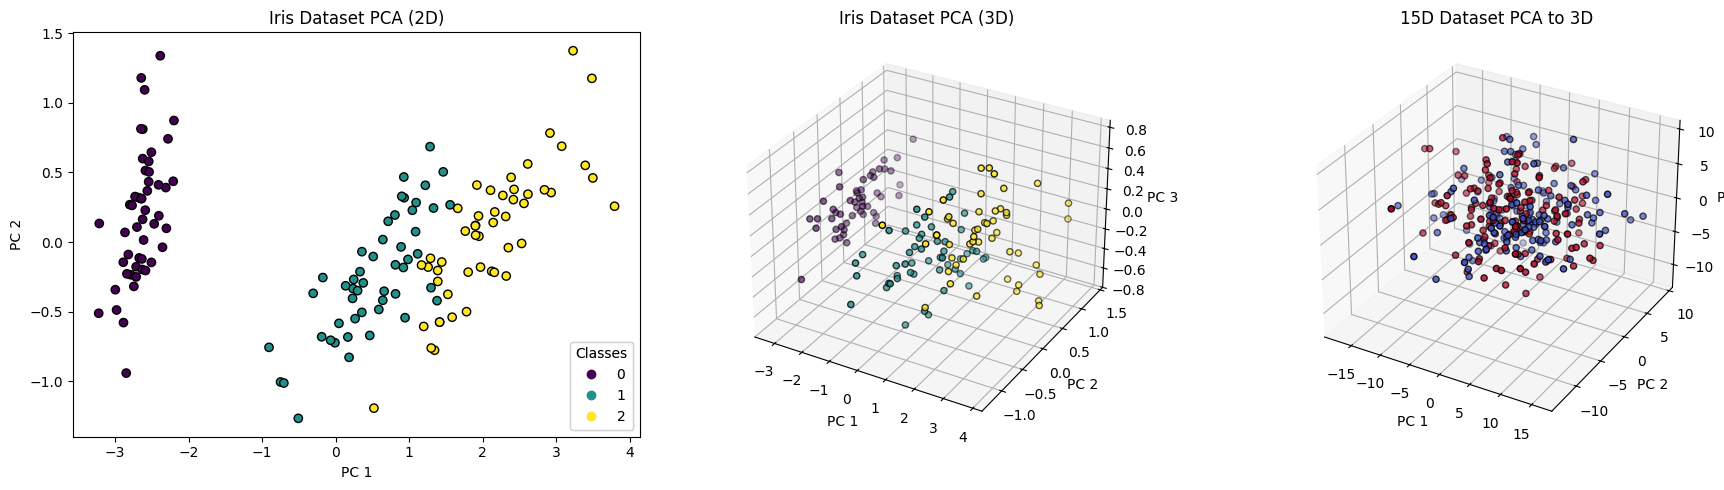

In [5]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_iris)

pca_3d = PCA(n_components=3)
X_3d = pca_3d.fit_transform(X_iris)

X_15d, y_15d = make_classification(n_samples=300, n_features=15, n_informative=10, n_redundant=5, random_state=42)
pca_3d_15d = PCA(n_components=3)
X_15d_3d = pca_3d_15d.fit_transform(X_15d)

fig = plt.figure(figsize=(18, 5))

ax1 = fig.add_subplot(131)
scatter1 = ax1.scatter(X_2d[:, 0], X_2d[:, 1], c=y_iris, cmap='viridis', edgecolor='k')
ax1.set_title('Iris Dataset PCA (2D)')
ax1.set_xlabel('PC 1')
ax1.set_ylabel('PC 2')
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes")
ax1.add_artist(legend1)

ax2 = fig.add_subplot(132, projection='3d')
scatter2 = ax2.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y_iris, cmap='viridis', edgecolor='k')
ax2.set_title('Iris Dataset PCA (3D)')
ax2.set_xlabel('PC 1')
ax2.set_ylabel('PC 2')
ax2.set_zlabel('PC 3')

ax3 = fig.add_subplot(133, projection='3d')
scatter3 = ax3.scatter(X_15d_3d[:, 0], X_15d_3d[:, 1], X_15d_3d[:, 2], c=y_15d, cmap='coolwarm', edgecolor='k')
ax3.set_title('15D Dataset PCA to 3D')
ax3.set_xlabel('PC 1')
ax3.set_ylabel('PC 2')
ax3.set_zlabel('PC 3')

plt.tight_layout()
plt.show()

Here are the visual results of applying PCA:

Iris Dataset PCA (2D):
Reduced from 4D to 2D using PCA. You can clearly see how PCA clusters the data by maximizing variance, even in just two dimensions.

Iris Dataset PCA (3D):
Reduced from 4D to 3D. Even more variance is captured compared to 2D. This 3D plot gives us a better separation between the classes.

15D Synthetic Dataset PCA to 3D:
A high-dimensional dataset (15D) is reduced to 3D. You can see how PCA helps visualize complex datasets that would otherwise be impossible to interpret directly.

### Conclusion
PCA is a powerful and versatile tool that transforms complex, high-dimensional data into simpler forms while preserving the most critical information. By identifying directions of maximum variance through eigenvectors of the covariance matrix, PCA creates a new set of uncorrelated features — the principal components — ranked by importance. These components enable us to reduce dimensionality, visualize multi-dimensional data, and improve computational efficiency for downstream tasks. We've shown how PCA not only reduces data complexity but also helps in uncovering hidden patterns. Whether applied in image compression, exploratory data analysis, or machine learning pipelines, PCA remains an essential technique for extracting meaningful structure from data.

### ** Problem 8. Eigenfaces
Another great use of eigenvalues and eigenvectors can be **feature detection**. In one algorithm, called **eigenfaces**, if you receive many images of faces, you can see "what makes a face". The principal characteristics of a face can be extracted using something similar to PCA.

You can see more info about the topic [at Wikipedia](https://en.wikipedia.org/wiki/Eigenface).

Use the checklist from above, but add information about the "eigenfaces" algorithm.
* How are images represented?
* How are the images transformed?
* What is an eigenface? Why does it look like a typical (albeit blurry) face?
* Implement the algorithm
* Train the algorithm on some face images
* Show what the eigenfaces you got look like
* Use the algorithm for face detection **in an unknown image**

### ** Problem 9. Clustering Analysis. How Different Metrics Affect Clustering Results
One important application of linear algebra is to calculate distances between two points. There are many different ways to calculate a distance. The one which is probably most familiar to you is the **Euclidean distance**. In 2D space, given points $A (x_A; y_A)$ and $B(x_B; y_B)$, the distance is 
$$ d = \sqrt{(x_B-x_A)^2 + (y_B-y_A)^2} = \sqrt{(\Delta x)^2 + (\Delta y)^2} $$

There are many more definitions of distance (see for example "taxicab distance").

Many algorithms in data processing and machine learning depend on calculating distances, mainly for calculating errors. A class of algorithms which is based on distances is called **cluster analysis**. Explore what cluster analysis is, and how different distance metrics (e.g. Eucledian and its derivate metrics, taxicab, hexagonal, octagonal, etc.) affect the quality of clustering. Of course, the type of metric you're going to use depends mostly on the data. Explore different scenarios and see why one is better than the other in a particular case.

* What are clusters of points? Why does real-world data tend to clusterize?
* What is clustering analysis? (Optional: What is unsupervised learning?)
* Provide examples of clustering analysis in 2D
* How are clusters defined?
* What is k-means clustering? Why does it converge?
* How does k-means depend on the initialization?
* How can we reduce the dependency on the initialization?
* What is agglomerative clustering (also called hierarchical clustering)?
* Implement (or use a ready-made implementation) k-means and agglomerative clustering
* The algorithms heavily depend on calculating distances between points. Show the results first using the Euclidean metric
* Use another metric (or several other metrics). Compare the results
* Use a custom metric. For example, this might be a function defined manually
* In which cases is a custom metric applicable?
* Apply clustering analysis for a real-world scenario. Some applications include social graphs (relations among people) of all sorts, connected crimes and classification.
* Use different distance metrics on the same dataset. How does it affect the data in general?